# LAB 2 - Eigenfaces

**Objectives:**

* Implement face recognition using [Eigen faces](http://en.wikipedia.org/wiki/Eigenface)

## Direct approach

1. Download the face images : [faces_tp_info_h_501.zip](http://homepages.ulb.ac.be/~odebeir/data/faces_tp_info_h_501.zip)
2. Write a program that reads images and subsample them (e.g. by 5)
3. Convert 2D images into lines. Collect all these lines into one single matrix **T**.
4. Zero-center **T** by removing the "mean image" ($T_i \leftarrow T_i - T_{mean}$)
5. Compute the variance/covariance matrix of **T**:
$$ \mathbf{S} = \mathbf{T^TT}$$
6. Compute the eigenvalues $\lambda_i$ and eigenvectors $\mathbf{v}_i$ of **S**
$$\mathbf{Sv}_i = \mathbf{T^T}\mathbf{Tv}_i = \lambda_i \mathbf{v}_i$$
7. The eigenvectors have the same size as the images, and are often referred to as "eigenfaces". Display some of them. 

In [1]:
#exemple of eigen value extraction
import numpy as np
from numpy import linalg as LA
w,v = LA.eig(np.diag((1, 2, 3)))
print(w,v)

[ 1.  2.  3.] [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [2]:
%matplotlib inline
import os
from skimage.io import imread
import matplotlib.pyplot as plt

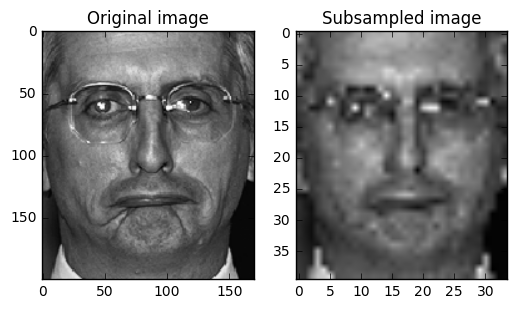

In [3]:
im = imread('./normal/00001fa010_930831.tif')
plt.gray()
plt.figure()
plt.subplot(1,2,1)
plt.imshow(im)
plt.title("Original image")
plt.subplot(1,2,2)
plt.imshow(im[::5,::5])
plt.title("Subsampled image")
plt.show()

## Compression
1. Reconstruct images using only the first N eigenfaces (e.g. N=100).
2. Compare (visually) reconstructed images with original images

## Indirect approach

Instead of using the eigenvalues/eigenvectors of $\mathbf{S} = \mathbf{T^TT}$, compute the the eigenvalues/eigenvectors of $\mathbf{Q} = \mathbf{TT^T}$.

Let $\mathbf{u_i}$ be the eigenvectors of $\mathbf{Q}$. We have:
$$\mathbf{TT^T}\mathbf{u}_i = \lambda_i \mathbf{u}_i$$

By multiplying to the left with $\mathbf{T^T}$, we have:
$$\mathbf{T^T}\mathbf{TT^T}\mathbf{u}_i = \lambda_i\mathbf{T^T}\mathbf{u}_i$$
$$\mathbf{S}\mathbf{T^T}\mathbf{u}_i = \lambda_i\mathbf{T^T}\mathbf{u}_i$$

Which means that if $\mathbf{u}_i$ is eigenvector of $\mathbf{Q}$, then $\mathbf{T^T}\mathbf{u}_i$ is eigenvector of $\mathbf{S}$.

The indirect approach thus becomes:
1. Compute the eigenvectors $\mathbf{u}_i$ of $\mathbf{Q} = \mathbf{TT^T}$.
2. Compute the eigenfaces with $\mathbf{v}_i = \mathbf{T^T}\mathbf{u}_i$ 
3. Reconstruct the images using only the first N eigenfaces (e.g. N=100)
4. Compare (visually) reconstructed images with original images
5. Use the indirect approach with more resolution (without subsampling the images)

## Face recognition
1. Using the simplified vector space (e.g. 100 first eigenfaces), compute the euclidian distance between one face and the others.
2. For a subset of the image of the database, find the 4 closest matches.